In [11]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')                  # do not show warnings
from __future__ import print_function
from scipy import interpolate, signal
from time import *
from obspy import *
from obspy.core import read, UTCDateTime
from obspy.clients.fdsn import Client
from obspy.signal.cross_correlation import xcorr_pick_correction
from obspy.signal.filter import lowpass
from matplotlib.mlab import detrend
from obspy.signal.invsim import cosine_taper 
from wf_fft import wf_fft
import numpy as np
import matplotlib.pylab as plt
import os
import glob
import wave
import struct
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['lines.linewidth'] = 1

# Adaptation of CAN_P.m by Carl Tape
# Coding by: Yongki Aiman, Tomy Gunawan, Angel Ling
# Analyzing the Sumatra P wave

# wf_fft is a homebrewed function.
# It MUST be in your working directory

# Run this cell before the beginning of each session

In [2]:
# Getting the all three components

client = Client("IRIS")
t = UTCDateTime("2004-12-26T00:52:23.900")
starttime = t-(1*3600) # 1 hr before the earthquake
endtime = t+(3*3600) # 3 hrs after the earthquake

st = client.get_waveforms("G", "CAN", "*", "B*", starttime, endtime, attach_response=True)
print(st)

3 Trace(s) in Stream:
G.CAN..BHE | 2004-12-25T23:52:23.941100Z - 2004-12-26T03:52:23.841100Z | 20.0 Hz, 287999 samples
G.CAN..BHN | 2004-12-25T23:52:23.941000Z - 2004-12-26T03:52:23.841000Z | 20.0 Hz, 287999 samples
G.CAN..BHZ | 2004-12-25T23:52:23.941000Z - 2004-12-26T03:52:23.841000Z | 20.0 Hz, 287999 samples


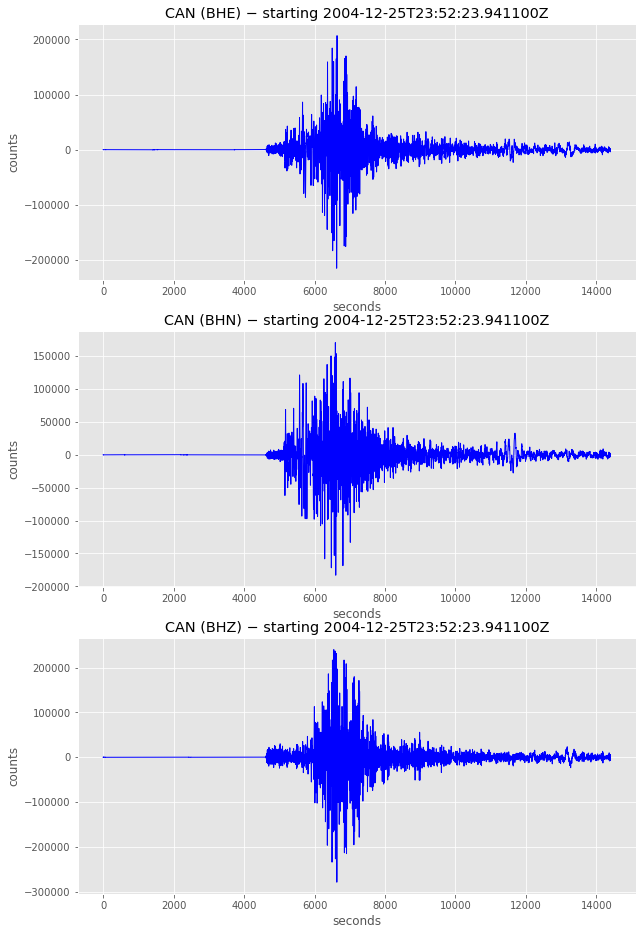

In [3]:
# Plot all three components
can = st.copy()

can_e = can[0].data
can_n = can[1].data
can_z = can[2].data
times = can[0].times()

title_e = 'CAN (BHE) − starting '+ str(can[0].stats['starttime'])
title_n = 'CAN (BHN) − starting '+ str(can[0].stats['starttime'])
title_z = 'CAN (BHZ) − starting '+ str(can[0].stats['starttime'])

fig, (ax1,ax2,ax3) = plt.subplots(3,1)
fig.set_size_inches(10,16)

ax1.plot(times,can_e, color='b')
ax1.set(xlabel='seconds',ylabel='counts',title=title_e)

ax2.plot(times,can_n, color='b')
ax2.set(xlabel='seconds',ylabel='counts',title=title_n)

ax3.plot(times,can_z, color='b')
ax3.set(xlabel='seconds',ylabel='counts',title=title_z)

plt.show();

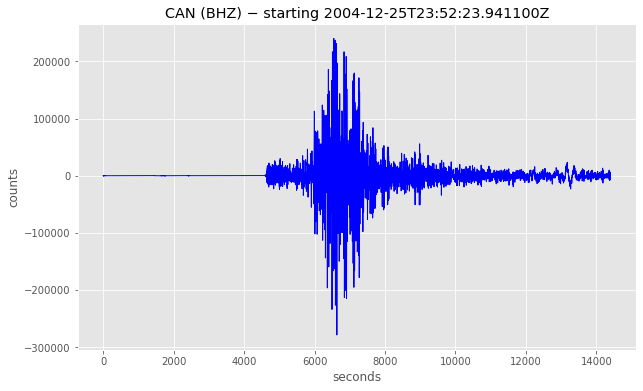

In [4]:
# Now examine the Z component only

plt.plot(times,can_z,color='b')
plt.title(title_z)
plt.xlabel('seconds')
plt.ylabel('counts')

plt.show();

1 Trace(s) in Stream:
G.CAN..BHZ | 2004-12-25T23:52:23.941000Z - 2004-12-26T03:52:23.841000Z | 20.0 Hz, 287999 samples


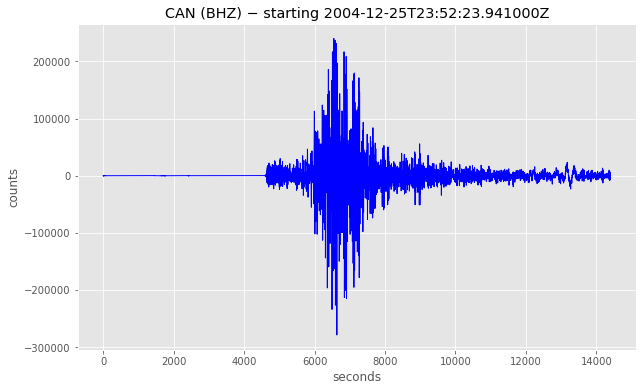

In [8]:
# Extract a subset time series
t1 = UTCDateTime("2004-12-26T00:52:23.900")
starttime1 = t1-(1*3600) # Change these to 'pick' the P wave!
endtime1 = t1+(3*3600) # Change these to 'pick' the P wave!

st1 = client.get_waveforms("G", "CAN", "*", "BHZ", starttime1, endtime1, attach_response=True)
print(st1)

# Plot your trace
y = st1[0].data
times = st1[0].times()
npts = st1[0].stats.npts
df = st1[0].stats.sampling_rate
fNy = df / 2.0

title = 'CAN (BHZ) − starting '+ str(st1[0].stats['starttime'])

plt.plot(times,st1[0].data, color='b')
plt.xlabel('seconds')
plt.ylabel('counts')
plt.title(title)
plt.show()

In [ ]:
# Do spectral analysis here

